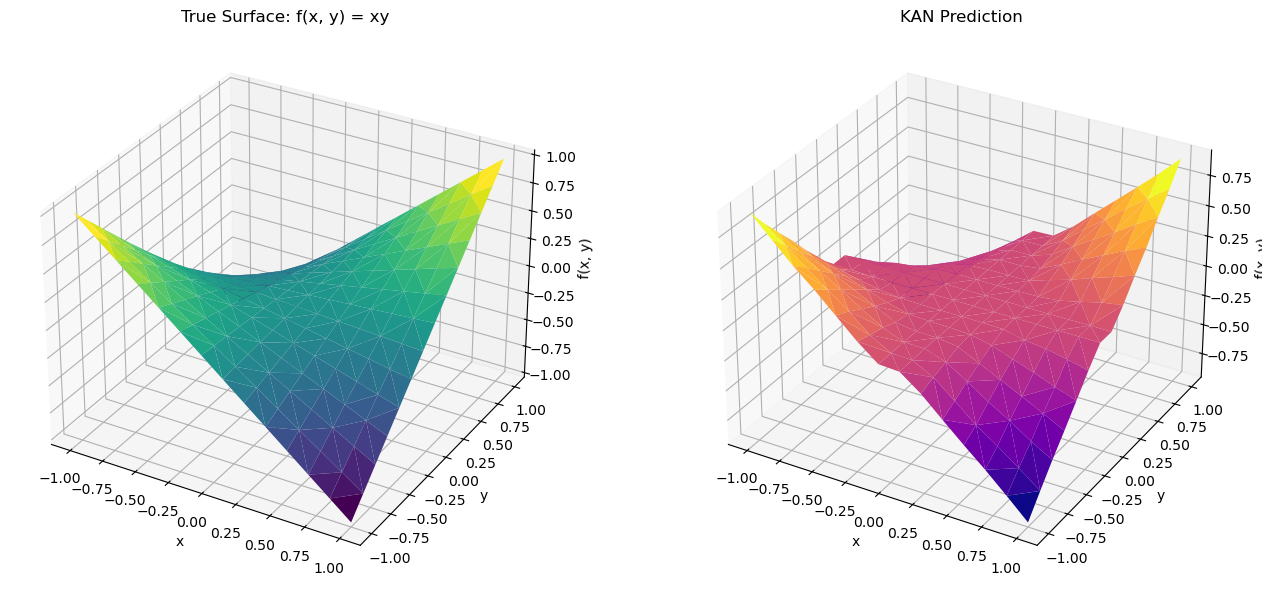

In [3]:
####################################################### 5/28/25: NEWEST XY FITTING WITH BESSEL KAN.PY ###############################################

import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from kan.KAN import KAN
import torch.nn as nn
import torch.optim as optim
from kan.qsp_activation import expectation_value

width = [5, 10, 10, 1] 

def generate_xy_data(n_points=50):
    x = np.linspace(-1, 1, int(np.sqrt(n_points)))
    X1, X2 = np.meshgrid(x, x)
    X = np.stack([X1.flatten(), X2.flatten()], axis=1)
    Y = (X[:, 0] * X[:, 1]).reshape(-1, 1)
    return X, Y

def cost_fn_with_L1(params, x_tensor, y_tensor, model, lambda_reg=1e-3):  # <-- NEW
    qsp_params = params[:model.num_qsp_params]
    alphas = params[model.num_qsp_params:]

    # Compute predictions using per-point QSP
    preds = []
    for i in range(x_tensor.shape[0]):
        qsp_input = x_tensor[i, 0] * x_tensor[i, 1]
        val = expectation_value(qsp_params, qsp_input.item(), depth=model.qsp_depth)
        preds.append(alphas[i] * val)
    preds = torch.tensor(preds).unsqueeze(1)

    # Compute MSE loss
    mse_loss = torch.mean((preds - y_tensor) ** 2)
    # Add L1 regularization on alphas
    reg = lambda_reg * torch.sum(torch.abs(torch.tensor(alphas)))
    return (mse_loss + reg).item()

def train_kan_on_dataset(x, y, width=width, steps=100):
    model = KAN(width=width, qsp_depth=10)
    x_tensor = torch.tensor(x, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)

    result = model.fit_qsp_with_alphas(
        x_tensor, y_tensor, maxiter=steps,
        cost_fn=lambda p: cost_fn_with_L1(p, x_tensor, y_tensor, model)
    )

    qsp_params = result.x[:model.num_qsp_params]
    alphas = result.x[model.num_qsp_params:]

    preds = []
    for i in range(x_tensor.shape[0]):
        qsp_input = x_tensor[i, 0] * x_tensor[i, 1]
        val = expectation_value(qsp_params, qsp_input.item(), depth=model.qsp_depth)
        preds.append(alphas[i] * val)
    preds = np.array(preds).reshape(-1, 1)
    return model, preds, x, y


def plot_surface(x, y_true, y_pred):
    fig = plt.figure(figsize=(14, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_trisurf(x[:, 0], x[:, 1], y_true.ravel(), cmap='viridis')
    ax1.set_title("True Surface: f(x, y) = xy")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("f(x, y)")

    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_trisurf(x[:, 0], x[:, 1], y_pred.ravel(), cmap='plasma')
    ax2.set_title("KAN Prediction")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    ax2.set_zlabel("f(x, y)")
    plt.tight_layout()
    plt.show()

def plot_error_curve():
    errors = []
    L_values = np.arange(10, 120, 20)
    for L in L_values:
        x_small, y_small = generate_xy_data(n_points=L)
        _, preds, _, y_true = train_kan_on_dataset(x_small, y_small, width=width, steps=100)
        mse = np.mean((preds.squeeze() - y_true.squeeze()) ** 2)
        errors.append(mse)

    plt.figure(figsize=(6, 4))
    plt.plot(L_values, errors, 'o-', label='MSE vs Training Size')
    plt.xlabel("Training Points")
    plt.ylabel("Mean Squared Error")
    plt.title("KAN Error: f(x, y) = xy")
    plt.grid(True)
    plt.legend()
    plt.show()

# --- Main execution ---
x_data, y_data = generate_xy_data(n_points=200)
model, preds, x_data, y_data = train_kan_on_dataset(x_data, y_data, width=width, steps=100)
plot_surface(x_data, y_data, preds)
# plot_error_curve()


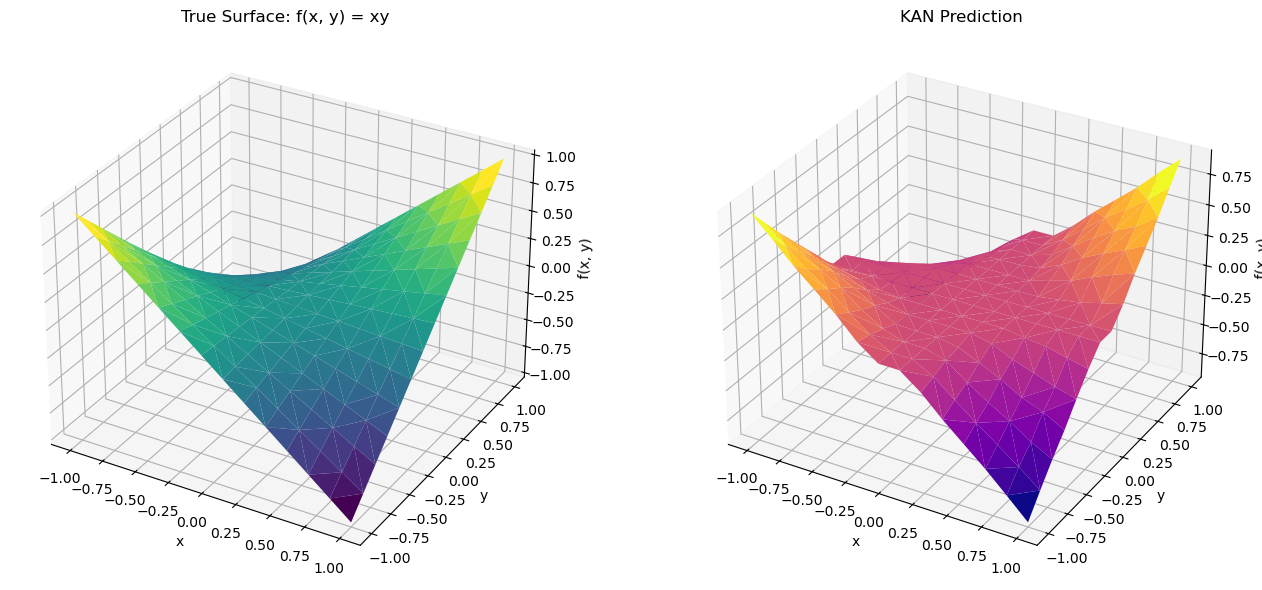

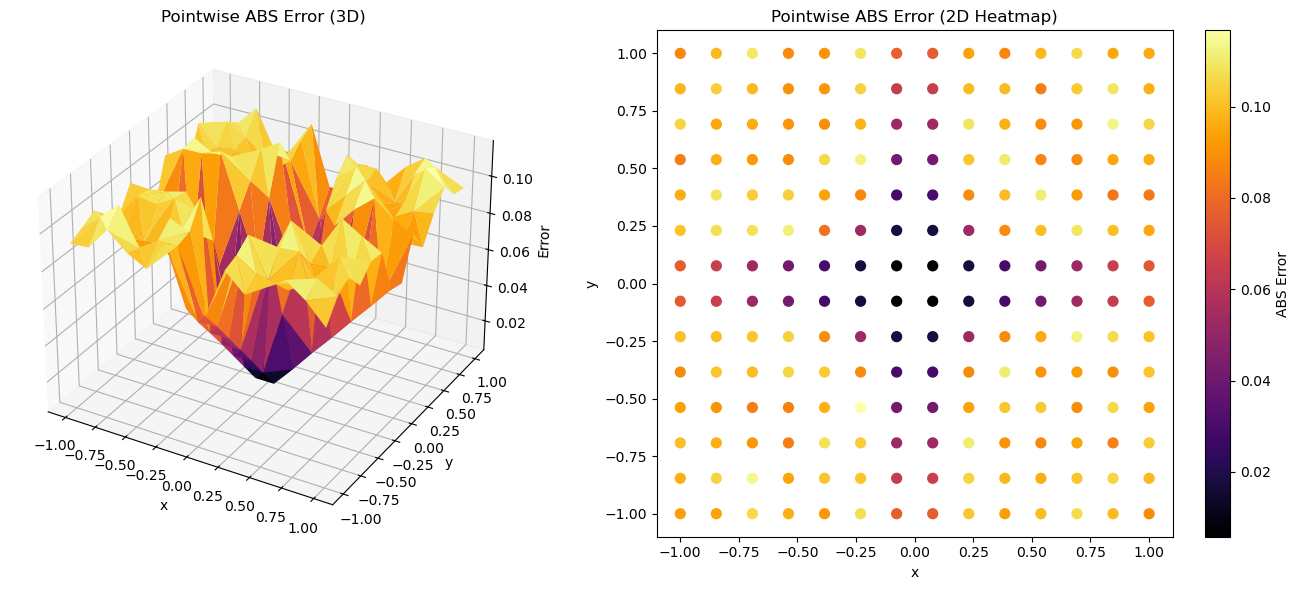

In [6]:
####################################################### 5/28/25: NEWEST XY FITTING WITH BESSEL KAN.PY ###############################################

import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from kan.KAN import KAN
import torch.nn as nn
import torch.optim as optim
from kan.qsp_activation import expectation_value

width = [10, 20, 20, 1] 

def generate_xy_data(n_points=50):
    x = np.linspace(-1, 1, int(np.sqrt(n_points)))
    X1, X2 = np.meshgrid(x, x)
    X = np.stack([X1.flatten(), X2.flatten()], axis=1)
    Y = (X[:, 0] * X[:, 1]).reshape(-1, 1)
    return X, Y

def cost_fn_with_L1(params, x_tensor, y_tensor, model, lambda_reg=1e-3):  # <-- NEW
    qsp_params = params[:model.num_qsp_params]
    alphas = params[model.num_qsp_params:]

    # Compute predictions using per-point QSP
    preds = []
    for i in range(x_tensor.shape[0]):
        qsp_input = x_tensor[i, 0] * x_tensor[i, 1]
        val = expectation_value(qsp_params, qsp_input.item(), depth=model.qsp_depth)
        preds.append(alphas[i] * val)
    preds = torch.tensor(preds).unsqueeze(1)

    # Compute MSE loss
    mse_loss = torch.mean((preds - y_tensor) ** 2)
    # Add L1 regularization on alphas
    reg = lambda_reg * torch.sum(torch.abs(torch.tensor(alphas)))
    return (mse_loss + reg).item()

def train_kan_on_dataset(x, y, width=width, steps=100):
    model = KAN(width=width, qsp_depth=10)
    x_tensor = torch.tensor(x, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)

    result = model.fit_qsp_with_alphas(
        x_tensor, y_tensor, maxiter=steps,
        cost_fn=lambda p: cost_fn_with_L1(p, x_tensor, y_tensor, model)
    )

    qsp_params = result.x[:model.num_qsp_params]
    alphas = result.x[model.num_qsp_params:]

    preds = []
    for i in range(x_tensor.shape[0]):
        qsp_input = x_tensor[i, 0] * x_tensor[i, 1]
        val = expectation_value(qsp_params, qsp_input.item(), depth=model.qsp_depth)
        preds.append(alphas[i] * val)
    preds = np.array(preds).reshape(-1, 1)
    return model, preds, x, y


def plot_surface(x, y_true, y_pred):
    fig = plt.figure(figsize=(14, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_trisurf(x[:, 0], x[:, 1], y_true.ravel(), cmap='viridis')
    ax1.set_title("True Surface: f(x, y) = xy")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("f(x, y)")

    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_trisurf(x[:, 0], x[:, 1], y_pred.ravel(), cmap='plasma')
    ax2.set_title("KAN Prediction")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    ax2.set_zlabel("f(x, y)")
    plt.tight_layout()
    plt.show()

def plot_error_curve(x, y_true, y_pred, error_type='abs'):
    error = np.abs(y_true - y_pred) if error_type == 'abs' else (y_true - y_pred) ** 2
    error = error.ravel()

    fig = plt.figure(figsize=(14, 6))

    # 3D error surface
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_trisurf(x[:, 0], x[:, 1], error, cmap='inferno')
    ax1.set_title(f"Pointwise {error_type.upper()} Error (3D)")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("Error")

    # 2D error heatmap
    ax2 = fig.add_subplot(122)
    sc = ax2.scatter(x[:, 0], x[:, 1], c=error, cmap='inferno', s=50)
    plt.colorbar(sc, ax=ax2, label=f'{error_type.upper()} Error')
    ax2.set_title(f"Pointwise {error_type.upper()} Error (2D Heatmap)")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    plt.tight_layout()
    plt.show()


# --- Main execution ---
x_data, y_data = generate_xy_data(n_points=200)
model, preds, x_data, y_data = train_kan_on_dataset(x_data, y_data, width=width, steps=100)
plot_surface(x_data, y_data, preds)
plot_error_curve(x_data, y_data, preds, error_type='abs')